# Testing Tradional CV Segmentations Methods

In [1]:
# Importing required modules
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
from os.path import join
from os import listdir
from scipy.signal import savgol_filter
import pandas as pd
from sklearn import svm
import array

## **1. Loading** <a class="anchor" id="1"></a>

In [2]:
def load(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(img)
    return img

In [3]:
def draw(img, c_map='gray'):
    plt.axis('off')
    plt.imshow(img, cmap=c_map)

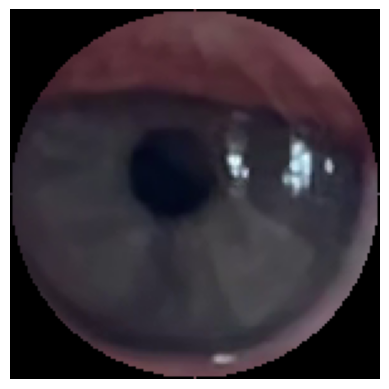

In [4]:
img0 = load('/Users/adityagupta/Desktop/pupillometry/TESTING/AD/1/iris/100.png')

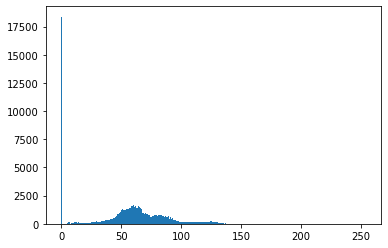

In [36]:
plt.hist(img0.ravel(),255,[0,254])
plt.show()

## **2. Segmentation** <a class="anchor" id="2"></a>

### **2.1 Grayscale**

In [5]:
img_gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)

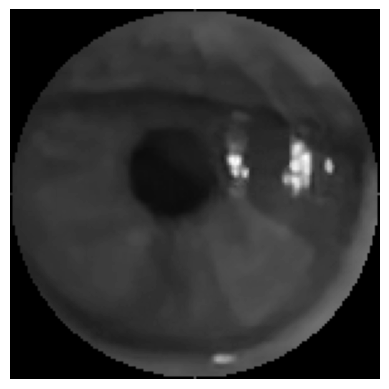

In [6]:
draw(img_gray)

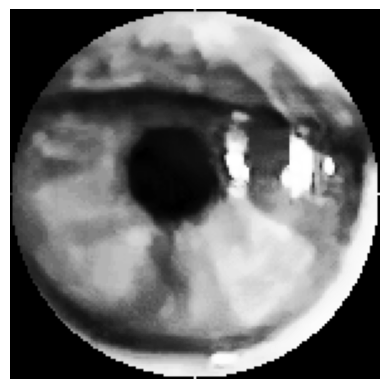

In [7]:
equ = cv2.equalizeHist(img_gray)
draw(equ)

### **2.2 Gaussian Filtering and Median Blur**

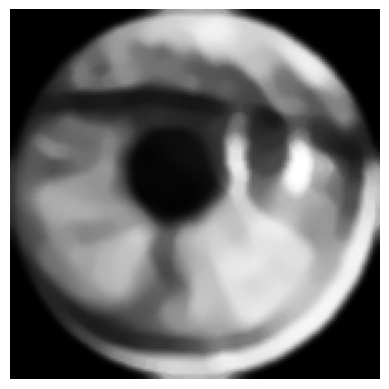

In [8]:
gray = cv2.GaussianBlur(equ,(7,7),0)
gray = cv2.medianBlur(gray,7)
plt.axis('off')
plt.imshow(gray, cmap='gray')

### **2.3 Binarization**

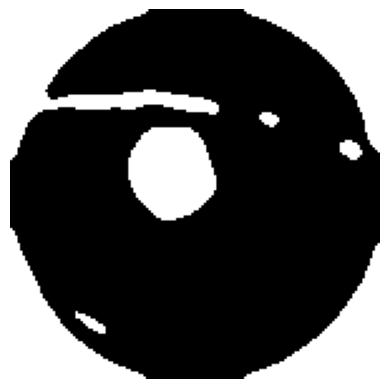

In [9]:
_,thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV)
plt.axis('off')
plt.imshow(thresh, cmap='gray')

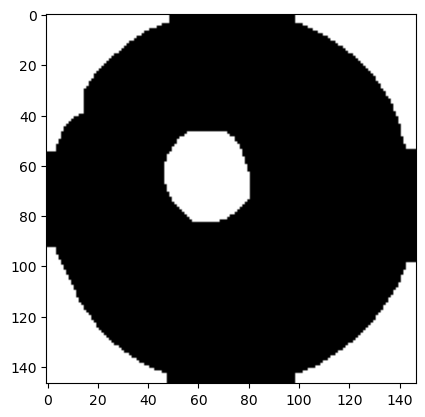

In [10]:
kernel = np.ones((7,7),np.uint8)
kernel_2 = np.ones((7,7),np.uint8)

opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel_2)

# plt.imshow(opening, cmap='gray')
plt.imshow(closing, cmap='gray')

### 2.4 Contour/Edge Detection

In [11]:
edges = cv2.dilate(cv2.Canny(closing,0,255),None)

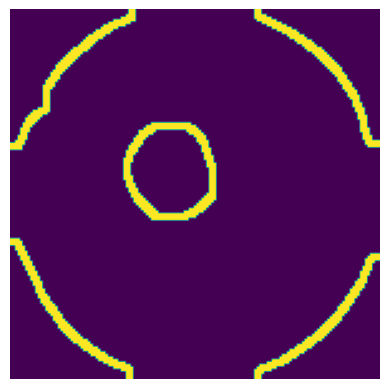

In [12]:
plt.axis('off')
plt.imshow(edges)

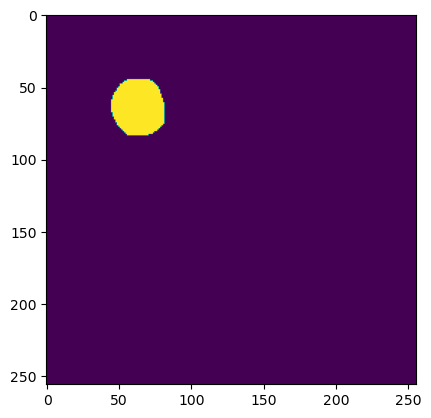

In [13]:
from scipy.spatial import distance
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-4:]

image_center = np.asarray(edges.shape) / 2
image_center = tuple(image_center.astype('int32'))

cns = []

for contour in cnt:
    # find center of each contour
    M = cv2.moments(contour)
    center_X = int(M["m10"] / M["m00"])
    center_Y = int(M["m01"] / M["m00"])
    contour_center = (center_X, center_Y)
    
    # calculate distance to image_center
    distances_to_center = (distance.euclidean(image_center, contour_center))
    
    cns.append({'contour': contour, 'center': contour_center, 'distance_to_center': distances_to_center})

closest_cnts = sorted(cns, key=lambda i: i['distance_to_center'])
cnt= closest_cnts[0]['contour']
                               
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

plt.imshow(masked)

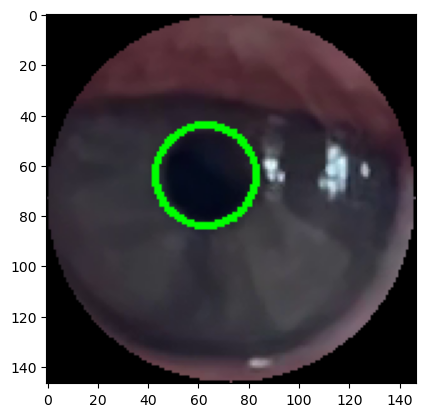

In [14]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
cv2.circle(img0,center,radius,(0,255,0),2)
plt.imshow(img0)

## Miscellaneous code for processing required tasks
This section contains code used for various tasks; calculating PFR parameters, saving collages for thesis, and general experimentation with pupillometry tasks

In [1373]:
for i in range (1,6):
    PATH = f"/Users/adityagupta/Desktop/pupillometry/TESTING/AD/{i}/eye_c"
    ims = sorted(list(listdir(PATH)))
    for im in ims:
        read = cv2.imread(join(PATH,im))
        if read is not None:
            grey = cv2.cvtColor(read, cv2.COLOR_BGR2GRAY)
            resize = cv2.resize(grey, (400, 640))
            cv2.imwrite(f"TESTING/AD/{i}/AD{i}/test/images/{im}",resize)

In [1374]:
for i in range (1,6):
    PATH = f"/Users/adityagupta/Desktop/pupillometry/TESTING/Healthy/{i}/eye_c"
    ims = sorted(list(listdir(PATH)))
    for im in ims:
        read = cv2.imread(join(PATH,im))
        if read is not None:
            grey = cv2.cvtColor(read, cv2.COLOR_BGR2GRAY)
            resize = cv2.resize(grey, (400, 640))
            cv2.imwrite(f"TESTING/Healthy/{i}/H{i}/test/images/{im}",resize)

In [281]:
from os import listdir
from os.path import join
PATH = f"/Users/adityagupta/Desktop/pupillometry/TESTING/AD/1/4"
ims = sorted(list(listdir(PATH)))
for im in ims:
    read = cv2.imread(join(PATH,im))
    if read is not None:
        grey = cv2.cvtColor(read, cv2.COLOR_BGR2GRAY)
        resize = cv2.resize(grey, (400, 640))
        cv2.imwrite(f"TESTING/AD/1/rit4_AD1/test/images/{im}",resize)

In [1467]:
for i in range (1,6):
    PATH = f"/Users/adityagupta/Desktop/pupillometry/TESTING/AD/{i}/final"
    ims = sorted(list(listdir(PATH)))
    for j in range(10):
        pick = np.random.choice(ims)
        print(pick)
        ims.remove(pick)
        read = cv2.imread(join(PATH,pick))
        rgb = cv2.cvtColor(read, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(f"/Users/adityagupta/Desktop/pupillometry/plot_7/{i}_{pick}",rgb)

811.png
232.png
618.png
670.png
593.png
657.png
533.png
20.png
519.png
407.png
228.png
420.png
388.png
491.png
434.png
131.png
516.png
41.png
480.png
169.png
238.png
125.png
462.png
107.png
161.png
469.png
343.png
34.png
364.png
365.png
496.png
35.png
385.png
443.png
171.png
70.png
530.png
429.png
110.png
426.png
170.png
30.png
152.png
86.png
54.png
5.png
23.png
10.png
189.png
171.png


In [ ]:
for im in list(listdir('/Users/adityagupta/Desktop/pupillometry/plot'):
    read = cv2.imread(join('/Users/adityagupta/Desktop/pupillometry/plot', im))
    read = cv2.cvtColor(read, cv2.COLOR_BGR2RGB)

In [468]:
og = cv2.imread('results/rit/0b.png')

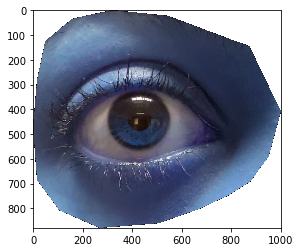

In [470]:
plt.imshow(og)

In [478]:
import os

In [483]:
count = 0

test = "/Users/adityagupta/Desktop/pupillometry/results/ashi_rit_results/images"
masks = "/Users/adityagupta/Desktop/pupillometry/results/mask"
path = "/Users/adityagupta/Desktop/pupillometry/results/ashi_rit_results"

for image in listdir(test):
    image = image.strip('.png')
    # print(os.path.join(path, 'images', image))
    og = cv2.imread(os.path.join(path, 'images', image+'.png'))
    mask = cv2.imread(os.path.join(path, 'mask', image+'.jpg'))[:,400:]

    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # apply binary thresholding
    ret, thresh = cv2.threshold(mask_gray, 150, 255, cv2.THRESH_BINARY)
        # print(thresh.shape)
        # # visualize the binary image
        # cv2.imshow('Binary image', thresh)
        # cv2.waitKey(0)
        # cv2.imwrite('image_thres1.jpg', thresh)
        # cv2.destroyAllWindows()

    cnt = sorted(cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)[-2], key=cv2.contourArea)[-1]
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    radius = int(radius)

    image_copy = og.copy()

    cv2.circle(image_copy,center,radius,(0,255,0),3)            
        # cv2.imshow('None approximation', image_copy)
        # cv2.waitKey(0)
    cv2.imwrite(f"results/ashi_rit_results/new2/{str(count)+'.jpg'}", image_copy)
    count+=1
        # cv2.destroyAllWindows()

In [201]:
import os
count = 0

test = "/Users/adityagupta/Desktop/pupillometry/TESTING/Healthy/1/H1_3/test/images"
masks = "/Users/adityagupta/Desktop/pupillometry/TESTING/Healthy/1/mask"
path = "/Users/adityagupta/Desktop/pupillometry/TESTING/Healthy/1"

for image in listdir(test):
    image = image.strip('.png')
    # print(os.path.join(path, 'images', image))
    og = cv2.imread(os.path.join(test, image+'.png'))
    mask = cv2.imread(os.path.join(path, 'mask', image+'.jpg'))[:,400:]
    
    eye = cv2.imread(join(path,'eye',image+'.png'))
    height = eye.shape[0]
    width = eye.shape[1]
    mask = cv2.resize(mask, (width,height))
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    # apply binary thresholding
    ret, thresh = cv2.threshold(mask_gray, 150, 255, cv2.THRESH_BINARY)
        # print(thresh.shape)
        # # visualize the binary image
        # cv2.imshow('Binary image', thresh)
        # cv2.waitKey(0)
        # cv2.imwrite('image_thres1.jpg', thresh)
        # cv2.destroyAllWindows()

    cnt = sorted(cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)[-2], key=cv2.contourArea)[-1]
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    radius = int(radius)

    image_copy = eye.copy()

    cv2.circle(image_copy,center,radius,(0,255,0),3)            
        # cv2.imshow('None approximation', image_copy)
        # cv2.waitKey(0)
    cv2.imwrite(f"Users/adityagupta/Desktop/pupillometry/TESTING/Healthy/1/rit_results_2/{str(count)+'.jpg'}", image_copy)
    count+=1
        # cv2.destroyAllWindows()

IndexError: list index out of range

In [1384]:
for i in range (1,6):
        
    path = f"/Users/adityagupta/Desktop/pupillometry/TESTING/Healthy/{i}"
    test_path = f"H{i}/test/images"
    count = int(sorted(list(listdir(join(path, test_path))))[0].strip('.png'))
    for image in sorted(list(listdir(join(path, test_path)))):
        im= image.strip('.png')
#         og = cv2.imread(os.path.join(path, test_path, im+'.png'))
        mask = cv2.imread(os.path.join(path, 'mask', im+'.jpg'))[:,400:]
        eye = cv2.imread(join(path,'eye_c',im+'.png'))
        height = eye.shape[0]
        width = eye.shape[1]
        mask = cv2.resize(mask, (width,height))
        mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(mask_gray, 150, 255, cv2.THRESH_BINARY)
        image_copy = eye.copy()
        try:
            cnt = sorted(cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)[-2], key=cv2.contourArea)[-1]
            (x,y),radius = cv2.minEnclosingCircle(cnt)
            center = (int(x),int(y))
            radius = int(radius)
            cv2.circle(image_copy,center,radius,(0,255,0),3) 
        except:
            pass
        cv2.imwrite(join(path, f"H_{i}", f"{str(count)}"+'.jpg'), image_copy)
        count+=1

In [81]:
PATH = 'TESTING/Healthy/1/eye'
ims = list(listdir(PATH))
for im in ims:
    read = cv2.imread(join(PATH,im))
    grey = cv2.cvtColor(read, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=1.0)
    cl1 = clahe.apply(grey)
    resize = cv2.resize(cl1, (400, 640))
    cv2.imwrite(f"TESTING/Healthy/1/H1_2/{im}",cl1)

In [1310]:
AD_time = {
    '1': [slice(394,526)],
    '2': [slice(182,314)],
    '3': [slice(85,217)],
    '4': [slice(286,406), slice(430, 442)], #418
    '5': [slice(34,50), slice(65,181)]
}
pupils = {}
for i in range(1,6):
    pupil = pd.read_csv(f"TESTING/AD/{i}/diam.csv").to_numpy()
    pupils[f"{i}"] = pupil.ravel()
    

def frames(i):
    slices = AD_time[str(i)]
    sizes = np.array([])
    for sl in slices:
        sizes = np.append(sizes, pupils[str(i)][sl])
    return sizes.ravel()
#     values = sizes.ravel()
#     maximum = max(values)
#     return values/maximum

In [1311]:
for i in range(1,6):
    print(len(frames(i)))

132
132
132
132
132


In [1316]:
def plot_pfr(i, save=False):
    yhat = savgol_filter(frames(i), 39, 3)
    plt.plot(yhat, color='green')
    plt.vlines(x=[29,102],ymin=0, ymax=5.0,colors='orange', ls='--', lw=2, label='contraction')
    plt.xlabel('Frame (60Hz) = 1/60 seconds')
    plt.ylabel('Pupil/Mediapipe Iris Size Ratio')
    plt.title('Pupil Flash Response')
    plt.annotate("", xy=(29, 2), xytext=(55, 2), arrowprops={"arrowstyle":"->", "color":"orange"},va='center')
    plt.annotate("Flash On", xy=(102, 2), xytext=(55, 2), arrowprops={"arrowstyle":"->", "color":"orange"},va='center')
    if save:
        plt.savefig(f"PFR{i}.png", dpi=500)
    return

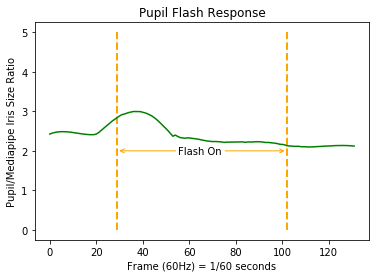

In [1320]:
plot_pfr(1)

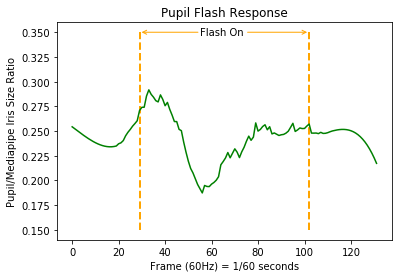

In [1025]:
plot_pfr(5)

In [721]:
grad = np.gradient(yhat)
print(min(grad))

-0.0034090428904539755


In [643]:
def plot_pfr(i, save=False):
    yhat = savgol_filter(frames(i), 39, 3)
    fig, ax = plt.subplots()
    ax.vlines(x=[29,102],ymin=0.15, ymax=0.35,colors='orange', ls='--', lw=2, label='contraction')
    ax.set_xlabel('Frame (60Hz) = 1/60 seconds')
    ax.set_ylabel('Pupil/Mediapipe Iris Size Ratio')
    ax.set_title('Pupil Flash Response')
    ax.annotate("", xy=(29, 0.35), xytext=(55, 0.35), arrowprops={"arrowstyle":"->", "color":"orange"},va='center')
    ax.annotate("Flash On", xy=(102, 0.35), xytext=(55, 0.35), arrowprops={"arrowstyle":"->", "color":"orange"},va='center')
    ax.plot(yhat, color='green')
    if save:
        plt.savefig(f"PFR{i}.png", dpi=500)
    return ax

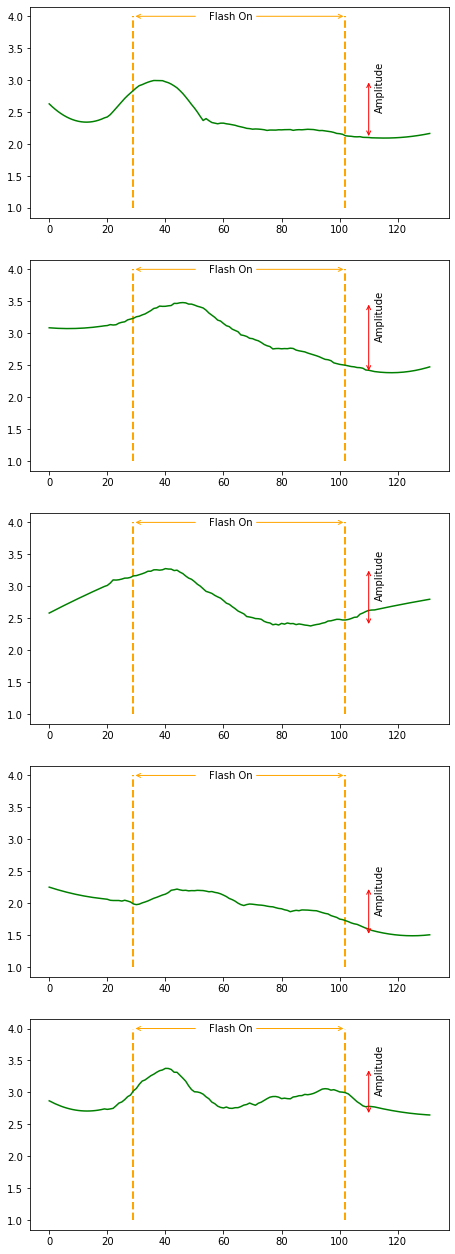

In [1524]:
MCV = []
AMP = []
CV = []
def display_axes(axes):
    for i, ax in enumerate(axes.ravel()):
        ax.vlines(x=[29,102],ymin=1, ymax=4,colors='orange', ls='--', lw=2, label='contraction')
#         ax.set_xlabel('Frame (60Hz) = 1/60 seconds')
#         ax.set_ylabel('Pupil/Mediapipe Iris Size Ratio')
#         ax.set_title('Pupil Flash Response')
        ax.annotate("", xy=(29, 4), xytext=(51, 4), arrowprops={"arrowstyle":"->", "color":"orange"},va='center')
        ax.annotate("Flash On", xy=(102, 4), xytext=(55, 4), arrowprops={"arrowstyle":"->", "color":"orange"},va='center')
        yhat = savgol_filter(frames(i+1), 39, 2)
        ma = max(yhat)
        mi = min(yhat)
        max_ind = np.argmax(yhat)
        min_ind = np.argmin(yhat)
        diff = ma-mi
        AMP.append(diff)
        loc = (ma + mi)/2
        CV.append(diff/(max_ind-min_ind)*60)
#         ax.vlines(x=[110],ymin=mi, ymax=ma,colors='red', ls='-', lw=2, label='contraction')
        ax.annotate("", xy=(110, mi), xytext=(110, ma), arrowprops={"arrowstyle":"<->", "color":"red"},va='center')
        ax.text(112,loc-0.025,'Amplitude',rotation=90)
        grad = np.gradient(yhat)
        MCV.append(min(grad)*60)
        ax.plot(yhat, color='green')
        plt.savefig("AD1.png")
# create figures and (2x2) axes array
fig, axes = plt.subplots(5, figsize=(7.5,22.5))
# fig.suptitle('Pupil Flash Response for each Participant')
# four (2*2=4) axes
ax1, ax2, ax3, ax4, ax5 = axes.ravel()
# for illustration purpose
display_axes(axes)

In [1500]:
print(AMP)
print(MCV)
print(CV)

[0.9336381797607229, 1.0928758637868001, 0.9149862730415972, 0.7643129418961021, 0.7190191301985536]
[-4.483165433018637, -2.409787888770487, -2.275738357753081, -1.8944093973732468, -3.814915293329162]
[-0.7570039295357213, -0.8861155652325406, -1.0764544388724673, -0.3728355814127327, -0.5197728652037737]


In [1027]:
MCV

[-0.0034090428904539755,
 -0.0016917752168015832,
 -0.004339846850243079,
 -0.00272669639380993,
 -0.010867328734753226]

In [1028]:
CV

[-0.000931112583457684,
 -0.0006238864371607844,
 -0.001422502129090091,
 -0.0008320911438555856,
 -0.004533396439953869]

In [1029]:
AMP

[0.06704010600895324,
 0.06987528096200785,
 0.09957514903630638,
 0.06573520036459127,
 0.10426811811893899]

In [1372]:
MCV

[-4.794358778439789,
 -2.7508417488297887,
 -2.2908674088241154,
 -2.1908916521962496,
 -3.927315882014506]

In [1371]:
AMP

[0.9665746880574351,
 1.070553954894165,
 0.9217602439550321,
 0.7542537991546219,
 0.7781803245433156]

In [1370]:
CV

[-0.7630852800453435,
 -0.9446064307889691,
 -1.4180926830077416,
 -0.5954635256483857,
 1.6675292668785335]

In [1030]:
dataset = pd.DataFrame({'MCV': MCV, 'CV': CV, 'AMP': AMP}, columns=['MCV', 'CV', 'AMP'])

In [1032]:
dataset.to_csv('AD_results.csv')

In [648]:
def figure():
    fig, axs = plt.subplots(5)
    fig.suptitle('Pupil Flash Response for each Participant')
    for i in range(5):
        plot = plot_pfr(i+1)
        axs[i] = plot
    plt.show()

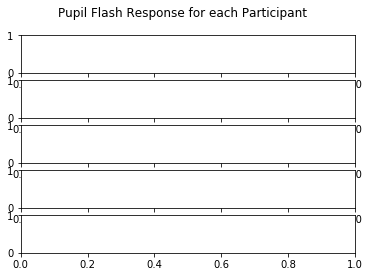

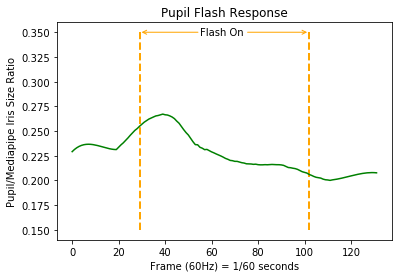

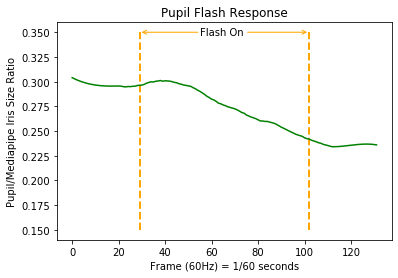

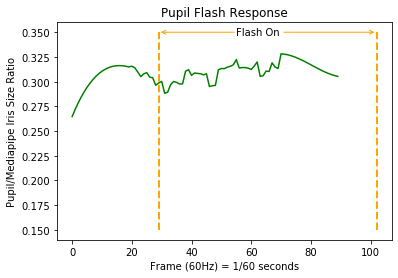

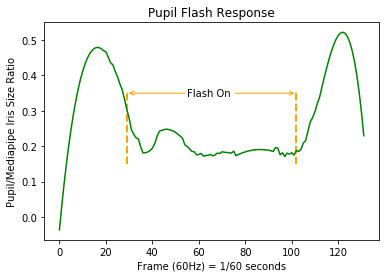

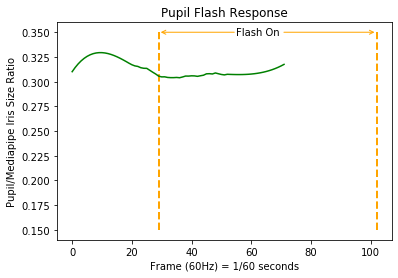

In [649]:
figure()

In [538]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [179]:
from scipy.interpolate import make_interp_spline
x = np.array([i for i in range(len(lis))])

In [180]:
X_Y_Spline = make_interp_spline(x, lis)

In [193]:
X_ = np.linspace(x.min(), x.max(), 100)
Y_ = X_Y_Spline(X_)

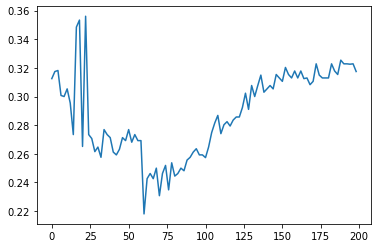

In [194]:
plt.plot(X_, Y_)

In [ ]:
plt.savefig('books_read.png')

In [ ]:
for i in range(20, 50):
    diam = []
    gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
    equ = cv2.equalizeHist(gray)
    gray = cv2.GaussianBlur(equ,(5,5),0)
    kernel = np.ones((7,7),np.uint8)
    kernel2 = np.ones((20,20),np.uint8)
    _,thresh = cv2.threshold(gray, i, 255, cv2.THRESH_BINARY_INV)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel2)
    edges = cv2.dilate(cv2.Canny(closing,0,255),None)
    cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
    (x,y),radius = cv2.minEnclosingCircle(cnt)
    center = (int(x),int(y))
    radius = int(radius)
    diam.append(radius*2/(int(r_radius)*2))
    cv2.circle(result,center,radius,(0,255,0),2)

In [1041]:
import PIL
import os

In [1061]:
def randomFile(directory):
    images=[]
    files_list = os.listdir(directory)
    for i in range(100):
        pic = np.random.choice(files_list)
        images.append(pic)
        files_list.remove(pic)
    collage = PIL.Image.new("RGBA", (2000,3000), color=(255,255,255,255))
    c=0
    for i in range(0,2000,200):
        for j in range(0,3000,300):
            image=PIL.Image.open((os.path.join(directory,images[c]))).convert("RGBA")
            photo = image.resize((200,300))        
            collage.paste(photo, (i,j))
            c+=1
            print(i,j)
    collage.save("collage_EDS.png")

randomFile('/Users/adityagupta/Desktop/pupillometry/results/test/ims')

0 0
0 300
0 600
0 900
0 1200
0 1500
0 1800
0 2100
0 2400
0 2700
200 0
200 300
200 600
200 900
200 1200
200 1500
200 1800
200 2100
200 2400
200 2700
400 0
400 300
400 600
400 900
400 1200
400 1500
400 1800
400 2100
400 2400
400 2700
600 0
600 300
600 600
600 900
600 1200
600 1500
600 1800
600 2100
600 2400
600 2700
800 0
800 300
800 600
800 900
800 1200
800 1500
800 1800
800 2100
800 2400
800 2700
1000 0
1000 300
1000 600
1000 900
1000 1200
1000 1500
1000 1800
1000 2100
1000 2400
1000 2700
1200 0
1200 300
1200 600
1200 900
1200 1200
1200 1500
1200 1800
1200 2100
1200 2400
1200 2700
1400 0
1400 300
1400 600
1400 900
1400 1200
1400 1500
1400 1800
1400 2100
1400 2400
1400 2700
1600 0
1600 300
1600 600
1600 900
1600 1200
1600 1500
1600 1800
1600 2100
1600 2400
1600 2700
1800 0
1800 300
1800 600
1800 900
1800 1200
1800 1500
1800 1800
1800 2100
1800 2400
1800 2700


In [ ]:
def randomFile(directory):
    images=[]
    files_list = os.listdir(directory)
    for i in range(100):
        pic = np.random.choice(files_list)
        images.append(pic)
        files_list.remove(pic)
    collage = PIL.Image.new("RGBA", (2000,3000), color=(255,255,255,255))
    c=0
    for i in range(0,2000,200):
        for j in range(0,3000,300):
            image=PIL.Image.open((os.path.join(directory,images[c]))).convert("RGBA")
            photo = image.resize((200,300))        
            collage.paste(photo, (i,j))
            c+=1
            print(i,j)
    collage.save("collage_EDS.png")

randomFile('/Users/adityagupta/Desktop/pupillometry/results/test/ims')

In [1468]:
files = sorted(list(os.listdir('/Users/adityagupta/Desktop/pupillometry/plot_8')))
collage = PIL.Image.new("RGBA", (2000,1000), color=(255,255,255,255))
files.remove('.DS_Store')
c=0
for i in range(0,2000,200):
    for j in range(0,1000,200):
        im = files[c]
        image=PIL.Image.open((os.path.join('/Users/adityagupta/Desktop/pupillometry/plot_8',files[c]))).convert("RGBA")
        photo = image.resize((200,200))        
        collage.paste(photo, (i,j))
        c+=1
        print(i,j)
collage.save("collage_4.png")

0 0
0 200
0 400
0 600
0 800
200 0
200 200
200 400
200 600
200 800
400 0
400 200
400 400
400 600
400 800
600 0
600 200
600 400
600 600
600 800
800 0
800 200
800 400
800 600
800 800
1000 0
1000 200
1000 400
1000 600
1000 800
1200 0
1200 200
1200 400
1200 600
1200 800
1400 0
1400 200
1400 400
1400 600
1400 800
1600 0
1600 200
1600 400
1600 600
1600 800
1800 0
1800 200
1800 400
1800 600
1800 800


In [1405]:
files = sorted(list(os.listdir('/Users/adityagupta/Desktop/pupillometry/plot_5')))
for file in files:
    print(file)
    if file[0] == '1':
        im = cv2.imread(join('/Users/adityagupta/Desktop/pupillometry/plot_5', file))
        im = cv2.flip(im, 1)
        cv2.imwrite(file, im)

1_144.jpg
1_159.jpg
1_191.jpg
1_193.jpg
1_194.jpg
1_195.jpg
1_203.jpg
1_221.jpg
1_224.jpg
1_252.jpg
2_104.jpg
2_114.jpg
2_123.jpg
2_153.jpg
2_166.jpg
2_185.jpg
2_208.jpg
2_215.jpg
2_230.jpg
2_232.jpg
3_106.jpg
3_118.jpg
3_127.jpg
3_147.jpg
3_152.jpg
3_179.jpg
3_185.jpg
3_205.jpg
3_209.jpg
3_225.jpg
4_120.jpg
4_123.jpg
4_146.jpg
4_149.jpg
4_176.jpg
4_182.jpg
4_196.jpg
4_210.jpg
4_221.jpg
4_226.jpg
5_127.jpg
5_133.jpg
5_140.jpg
5_146.jpg
5_157.jpg
5_163.jpg
5_184.jpg
5_191.jpg
5_206.jpg
5_218.jpg
